# Durée de retour à l'emploi pour les salariés en perte d'emploi : les déterminants endogènes et exogènes

> ##### *> notebook "parties `descriptive` & `prédictive`"*
> ##### *> la partie `"exploratoire"` fait l'objet d'un notebook distinct*

# 1. Introduction

En cas de licenciement économique, une entreprise est soumise à une "obligation" de reclassement :
> *« Le licenciement pour motif économique d’un salarié ne peut intervenir que lorsque tous les efforts de formation et d’adaptation ont été réalisés et que le reclassement de l’intéressé ne peut être opéré sur les emplois disponibles, situés sur le territoire national dans l’entreprise ou les autres entreprises du groupe dont l’entreprise fait partie et dont l’organisation, les activités ou le lieu d’exploitation assurent la permutation de tout ou partie du personnel [article L. 1233-4 du code du travail] »*

Si cette obligation s'applique à toute entreprise quelle que soit sa taille, les grandes entreprises dont l'effectif dépasse 1000 salariés sont tenues de proposer un dispositif spécifique de "congé de reclassement" aux salariés licenciés. Formalisé au sein du Plan de Sauvegarde de l'Emploi (PSE), ce dispositif comporte des prestations de formation, de soutien et d'aide au reclassement professionnel via une cellule de reclassement mise en œuvre par l'employeur.

Généralement, ces grands groupes confient à un cabinet de conseil RH spécialisé dans les transitions professionnelles le soin d'accompagner la mobilité externe de leur collectif de salariés, tout en continuant à prendre en charge  la rémunération des salariés jusqu'à leur repositionnement (nouvel emploi, formation de reconversion, création d'entreprise, ...). Le PSE prévoit également la durée du congé de reclassement et de la cellule de reclassement, généralement entre 4 et 12 mois (mais pouvant exceptionnellement être portée à 24 mois).

Dans ce contexte, la perspective de pouvoir estimer la durée du retour à l'emploi (ou à la "solution" dans le cas d'une création d'entreprise ou d'une formation de reconversion), présente un double avantage :
- pour l'employeur, estimer le montant de la rémunération à provisonner en fonction de cette durée prévisionnelle ;
- pour le cabinet RH qui gère la cellule de reclassement, optimiser les ressources dédiées et notamment gérer une charge dégressive en fonction des typologies de population.

Au demeurant, cette problématique pourrait se poser dans des termes similaires à l'Etat, dans le cadre de la gestion des allocations chômage et de l'activité des conseillers Pôle Emploi chargés d'accompagner les demandeurs d'emploi...

Le machine learning a déjà été utilisé dans le domaine RH, par exemple pour prévoir un turn over et mettre en place des mesures individuelles de rétention des talents. Des professeurs américains ont développé le « turnover propensity index » (TPI), un algorithme permettant de savoir en temps réel si un employé va quitter son entreprise, en exploitant les nombreuses datas dont disposent les entreprises sur leurs salariés (https://www.helloworkplace.fr/predire-depart-collaborateurs/).

L'activité d'accompagnement au repositionnement professionnel génère elle-aussi de nombreuses datas dont l'analyse permet de proposer des "déterminants" pesant plus ou moins fortement sur la capacité à se repositionner :
- des données "endogènes" liées aux caractéristiques socio-professionnelles du salarié et de l'entreprise ;
- des données "exogènes" liées au territoire plus ou moins dynamique dans lequel vit le salarié, mais aussi à la filière d'activité plus ou moins créatrice ou destructrice d'emplois ;
- bien évidemment, les facteurs "psychologiques" ne sont pas des indicateurs disponibles dans ces bases de données, même si ces déterminants jouent de fait un rôle important dans la capacité d'un individu à se repositionner (dynamisme, croyances, contraintes individuelles, ...).

Parmi les hypothèses les plus couramment admises sur les freins et les leviers à l'emploi :
1. `l'âge` : l'employabilité (qui rend un individu professionnellement attractif) serait meilleure entre 30 et 45 ans : avant, le manque d'expérience peut-être coonsidéré comme un handicap, après, la "seniorité" est plus souvent perçue comme un frein par les employeurs ;
2. `l'ancienneté` (ou le nombre d'année d'expérience) : comme l'âge, l'ancienneté (dans la vie active ou dans le métier) apporte une indication de "seniorite" et de "maitrise", tandis que l'ancienneté dans une entreprise apporte un indicateur d'adaptabilité (une durée trop importante peut être considérée comme un signe d'immobilisme, une durée tro courte comme un signe d'instabilité) ;
3. `le genre` : en fonction des activités, certains métiers sont plus "masculins" et d'autres plus "féminins", et de multiples freins sociaux continuent de peser sur l'embauche des femmes supposés ou réels (formation initiale, mobilité en zone rurale peu dense, gardes d'enfants et contraintes familiales, "croyances" des recruteurs, ...) ;
4. `la qualification` (a minima le diplôme initial) : si globalement l'employabilité augmente avec le niveau de diplôme, il est à mettre en regard avec la typologie du tisu économique local : augmentation de la part de cadres dans le cadre d'une économie tertiaire ou au contraire demande de main d'oeuvre locale plus orientée métiers intermédiaires avec des diplômes professionnels ... la "qualification" s'apprécie dans le cadre des spécificités de la demande locale ;
5. `la CSP` : l'indicateur donne l'avantage aux CSP plus qualifiées, mais là-aussi la typologie des entreprises locales plus ou moins demandeuses de "qualification" relativise parfois cette assertion ;
6. `le "métier"` (le précédent poste occupé) : il s'agit probablement de la variable la plus significative, mais aussi la plus compliquée à obtenir. Chaque demandeur d'emploi fait sûrement l'objet d'une catégorisation par Pôle Emploi  de son "métier" selon le code Rome (Répertoire Opérationnel des Métiers et des Emplois comportant 14 grands domaines, 110 domaines professionnels, 532 fiches métiers et plus de 11 000 appellations https://www.pole-emploi.fr/employeur/vos-recrutements/le-rome-et-les-fiches-metiers.html). Dans les entreprises, la donnée est rarement disponible sous cette forme, chacune possédant sa nomenclature spécifique, sans compter l'apparition de nouveaux métiers alors que le code Rome n'est plus actualisé depuis juillet 2021 dans l'attente de la V4 (https://www.pole-emploi.org/opendata/repertoire-operationnel-des-meti.html?type=article#:~:text=Le%20ROME%20est%20organis%C3%A9%20autour,plus%20de%2011%20000%20appellations.) ;
7. `la taille de l'entreprise d'origine` : on sait qu'un salarié issu d'un grand groupe bénéficie de la "notoriété" de son entreprise ... ce qui peut aussi peser a contrario en cas d'image dégradée sur le territoire ;
8. `le secteur d'activité de l'entreprise d'origine` : certains métiers sont dits "transverses" ou "supports", et peuvent être exercés dans n'importe quelle branche d'activité ; d'autres sont des métiers techniques spécifiques, et peuvent appartenir à une filière mature (peu de création nette d'emplois), en décroissance (perte d'emplois) ou en émergence (croissance des emplois). En fonction des territoires, cette filière peut être fortement représentée (donc gisement d'emplois importants avec du turn over en matière de recrutement) ou très faiblement (peu d'opportunités) ;
9. `le code postal` permet d'identifier le territoire du salarié, et donc d'injecter des déterminants "exogènes" liés au dynamisme du marché du travail local : en l'occurence pour ce projet, nous avons choisi le `taux de chômage` (disponible à l'échelle de la zone d'emploi pour le 4ème trimestre 2021) et `l'indice de concentration d'emploi` (nombre d'emploi pour 100 habitants à l'écchelle de la commune en 2018), mais l'INSEE et la DATAR proposent de multiples autres indicateurs à explorer.

# 2. Import des librairies et de la base de données

#### 2.1. Constitution de la BDD à partir de plusieurs jeux de données

Pour ce projet, la BDD des salariés a été créée de manière fictive, avec les indicateurs suivants :

**1. données endogènes "fictives" :**
- id
- nom
- prénom
- date de naissance
- age
- csp
- nombre de salariés (de l'entreprise d'origine)
- code NAF (de l'entreprise d'origine)
- ville
- code commune
- code postal
- département
- population
- durée du retour à l'emploi (en jour)

**2. données exogènes (injectées par jointure avec le code postal) :**
- taux de chômage de la zone d'emploi (2021)
- indice de concentration d'emploi (2018)

A la différence d'un vrai jeu de données, toutes les hypothèses précitées n'ont donc pas toujours pu être paramétrées.
Par exemple, les codes postaux ont été injectés aléatoirement, ne permettant pas de vérifier le lien entre durée de retour à l'emploi et vitalité du territoire.
Nous avons cependant injecté ces 2 indicateurs pour l'exercice, car ils sont déterminants dans le monde réel.

Afin de simplifier l'exercice, les variables suivantes n'ont pas été traitées :
- date de naissance : au bénéfice de la variable âge ;
- code NAF : afin d'éviter l'encodage de 88 colonnes correspondant aux 88 divisions NAF ;
- le code commune, le département, la population : nous avons gardé uniquement le code postal, qui est la seule information "territoriale" dont nous disposons généralement dans les vrais jeux de données.

> *L'ensemble du travail effectué pour la constitution du jeu de données est accessible dans le notebook 0_exploration_7.*

### 2.2. Autres éléments disponibles

Le dossier "projet_desu_tre" a été constitué selon l'arborescence cookiecutter.

L'ensemble des fichiers utilisés figurent dans le sous-dossier "data" :
- données endogènes (répertoire "raw")
- jeux de données exogènes (répertoire "external")
- base de données consolidée et nettoyée (répertoire "processed")

2 notebooks sont disponibles dans le sous-dossier "notebooks" :
- 0_exploration__
- 1_description_7
- le répertoire "Old" comporte les versions intermédiaires des notebooks

Ils sont consultables sur le Github : https://github.com/EmmaManou/projet_desu_tre

### 2.3. Importation des librairies

In [1]:
# la plupart des librairies nécessaires ont déjà été installées depuis anaconda dans l'environnement virtuel et déjà utilisées dans le notebook EXPLORATION.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 4.4. Téléchargement de la base de données

In [2]:
#importation du jeu de données utilisé
tre_df = pd.read_csv(r"C:\Users\emman\Documents\4_Diplômes\2022_DESU-AMU\0_Projet\projet_desu_tre\data\processed\tre_dataframe.csv")
tre_df

,id,genre,prenom,nom,age,csp,nbr_de_salaries,ville,duree_rae,ze,chomage_2021T4,concentr_emp2018
0,1,h,Daniel,VOL,39,Employé,208,Reinhardsmunster,351,Sarrebourg,5.4,12.7
1,2,f,Valentine,GAUGET PETIT,32,Cadre supérieur,324,Villefranche-de-Conflent,215,Perpignan,12.1,179.5
2,3,f,Angèle,BELAOUAZZA,21,Cadre supérieur,196,Saint-Gervais-les-Bains,270,Le Mont Blanc,4.1,68.9
3,4,f,Jeanine,HERMOSA GUIRADO,39,Cadre,538,La Verpillière,166,Bourgoin-Jallieu,6.3,91.1
4,5,h,Amaury,HALBERT,35,Ouvrier,930,Montpellier,45,Montpellier,9.8,151.3
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49995,h,Ghislain,ASATEKIN,29,Technicien Maîtrise,2965,Toulouse,0,Toulouse,7.4,152.4
49995,49996,h,Julien,PAUL DUBAIL,33,Cadre,452,Marseille 13e Arrondissement,168,Marseille,9.6,112.0
49996,49997,h,Hercule,UKOBIZABA,30,Cadre,5010,Néris-les-Bains,55,Montluçon,8.8,101.0
49997,49998,f,Vienne,FLAUJAT,54,Cadre supérieur,586,Plateau d'Hauteville,33,Belley,5.5,118.2


# 3. Statistiques descriptives

### 3.1 Overview : première analyse statistique des données

In [3]:
# affiche la taille de la BDD
print("Nombre de lignes: ", tre_df.shape[0])
print("Nombre de colonnes: ", tre_df.shape[1])

Nombre de lignes:  49999
Nombre de colonnes:  12


In [4]:
# affiche le type de colonnes
tre_df.dtypes

id                    int64
genre                object
prenom               object
nom                  object
age                   int64
csp                  object
nbr_de_salaries       int64
ville                object
duree_rae             int64
ze                   object
chomage_2021T4      float64
concentr_emp2018    float64
dtype: object

In [5]:
# pour chaque colonne, affiche : le nombre de valeurs présentes, différentes et manquantes
for col in tre_df.columns:
    print(col, " : ", tre_df[col].count(), " valeurs - ", tre_df[col].nunique(), " valeurs différentes - ", tre_df[col].isna().sum(), " valeurs manquantes")

id  :  49999  valeurs -  49999  valeurs différentes -  0  valeurs manquantes
genre  :  49999  valeurs -  2  valeurs différentes -  0  valeurs manquantes
prenom  :  49999  valeurs -  558  valeurs différentes -  0  valeurs manquantes
nom  :  49999  valeurs -  48608  valeurs différentes -  0  valeurs manquantes
age  :  49999  valeurs -  41  valeurs différentes -  0  valeurs manquantes
csp  :  49999  valeurs -  5  valeurs différentes -  0  valeurs manquantes
nbr_de_salaries  :  49999  valeurs -  7824  valeurs différentes -  0  valeurs manquantes
ville  :  49999  valeurs -  10730  valeurs différentes -  0  valeurs manquantes
duree_rae  :  49999  valeurs -  662  valeurs différentes -  0  valeurs manquantes
ze  :  49999  valeurs -  287  valeurs différentes -  0  valeurs manquantes
chomage_2021T4  :  49999  valeurs -  73  valeurs différentes -  0  valeurs manquantes
concentr_emp2018  :  49999  valeurs -  2037  valeurs différentes -  0  valeurs manquantes


> La BDD ayant été préalablement nettoyée en phase d'exploration, il n'y a aucune donnée manquante ou incohérente ou doublonnée.

In [6]:
### description et résumé statistique des colonnes
tre_df.info()
tre_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                49999 non-null  int64  
 1   genre             49999 non-null  object 
 2   prenom            49999 non-null  object 
 3   nom               49999 non-null  object 
 4   age               49999 non-null  int64  
 5   csp               49999 non-null  object 
 6   nbr_de_salaries   49999 non-null  int64  
 7   ville             49999 non-null  object 
 8   duree_rae         49999 non-null  int64  
 9   ze                49999 non-null  object 
 10  chomage_2021T4    49999 non-null  float64
 11  concentr_emp2018  49999 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


,id,age,nbr_de_salaries,duree_rae,chomage_2021T4,concentr_emp2018
count,49999.000000,49999.000000,49999.00000,49999.000000,49999.000000,49999.000000
mean,25000.000000,41.864837,1696.50151,219.027421,7.183660,108.987662
std,14433.612391,11.325761,2591.43072,182.441872,1.627317,64.823419
min,1.000000,20.000000,0.00000,-83.000000,3.400000,0.000000
25%,12500.500000,32.000000,200.00000,62.000000,6.200000,59.350000
50%,25000.000000,43.000000,502.00000,168.000000,7.100000,112.000000
75%,37499.500000,51.000000,1107.50000,345.000000,7.900000,152.400000
max,49999.000000,60.000000,10000.00000,593.000000,14.300000,4498.600000


> Quelques variables demandes à être "nettoyées" en raison de valeurs incohérentes, en suppirmant les lignes contenant ces données :
- nombre de salariés (de l'entreprise d'origine) : ne peut pas être égal à zero - minimum requis de 50 salariés
- durée du retour à l'emploi : doit forcément être positif
- indice de concentration de l'emploi : vérifier que les valeurs maxi (4498 emplois pour 100 habitants) et mini (0 emploi pour 100 habitants) sont cohérentes par rapport au territoire
- suppression des colonnes NOM et PRENOM (anonymisation)

##### Préparation de la variable à expliquer : temps de reclassement (duree_rae)

In [7]:
# Affichage des 5 valeurs les plus élevées et les plus basses
tre_df.sort_values(by=['duree_rae'], ascending=False)

,id,genre,prenom,nom,age,csp,nbr_de_salaries,ville,duree_rae,ze,chomage_2021T4,concentr_emp2018
12185,12186,h,Gabriel,VAROSCIC,30,Employé,198,Saint-Vital,593,La Tarentaise,4.7,35.6
34037,34038,f,Léonie,DELEVALLEE,35,Technicien Maîtrise,173,Souleuvre en Bocage,593,Vire Normandie,6.1,40.2
33992,33993,f,Philippine,RONCAJOLI,28,Ouvrier,112,Amiens,593,Amiens,8.8,165.8
33996,33997,h,Aimé,ANZALI,37,Technicien Maîtrise,86,Noisy-le-Grand,593,Paris,7.2,91.8
33998,33999,h,Gabriel,DOGGETT,29,Technicien Maîtrise,80,Val-de-Reuil,593,Rouen,7.9,252.8
...,...,...,...,...,...,...,...,...,...,...,...,...
40159,40160,h,Georges,EL SEYED,59,Employé,229,Toulouse,-64,Toulouse,7.4,152.4
1906,1907,f,Adeline,POULBASSIA,56,Ouvrier,140,Toulouse,-68,Toulouse,7.4,152.4
44160,44161,f,Rosine,DUARTE LOPES RIBEIRO,51,Ouvrier,209,Toulouse,-70,Toulouse,7.4,152.4
10812,10813,f,Henriette,KAINA,59,Ouvrier,145,Toulouse,-76,Toulouse,7.4,152.4


> on remarque des valeurs incohérentes puisqu'il y a des durées négatives, qu'il va falloir supprimer

In [8]:
# affichage des valeurs négatives dans la colonne "duree_rae"
tre_df.loc[tre_df['duree_rae'] < 0].shape

(1410, 12)

> 1410 lignes comportent une durée de reclassement négative : on va les supprimer pour ne pas fausser l'analyse

In [9]:
# récupérer les index des lignes  pour lesquelles la duree_rae est négative
indexNames = tre_df[ tre_df['duree_rae'] < 0].index
# suppression des 1410 lignes avec duree_rae négative
tre_df.drop(indexNames , inplace=True)
tre_df.shape

(48589, 12)

In [10]:
49999 - 1410

48589

In [11]:
# chiffres clés de la valariable duree_rae
print ("Durée de reclassement : chiffres clés")
tre_df.duree_rae.describe()

Durée de reclassement : chiffres clés


count    48589.000000
mean       225.865937
std        180.517948
min          0.000000
25%         67.000000
50%        177.000000
75%        351.000000
max        593.000000
Name: duree_rae, dtype: float64

##### Nettoyage de la valeur nbr_de_salaries
> la colonne comporte des valeurs nulles, alors que le nombre de salariés est forcément supérieur à 50

In [12]:
# afficher le nombre de lignes avec des valeurs "nbr_de_salaries" = à 0 puis inférieures à 50
print (len(tre_df[tre_df.nbr_de_salaries==0]))
print (len(tre_df[tre_df.nbr_de_salaries<50]))

22
1189


In [13]:
# supprimer les lignes dont le "nbr_de_salaries" est inférieur à 50, soit 1189 lignes en moins
tre_df.drop(tre_df.loc[tre_df['nbr_de_salaries']<50].index, inplace=True)
tre_df.shape

(47400, 12)

In [14]:
48589 - 1189

47400

##### Vérification des valeurs de la colonne 3 concentr_emp2018

> la colonne comporte des indices de concentration d'emploi très élevés ou nuls : il faut vérifier que cela est cohérent avec le territoire concerné

In [15]:
# Affichage des 5 valeurs les plus élevées et les plus basses
tre_df.sort_values(by=['concentr_emp2018'], ascending=False)

,id,genre,prenom,nom,age,csp,nbr_de_salaries,ville,duree_rae,ze,chomage_2021T4,concentr_emp2018
56,57,h,Lambert,BRACOT,28,Ouvrier,875,Roissy-en-France,137,Roissy,9.6,4498.6
14969,14970,f,Roxanne,COILHAC,36,Cadre,9078,Roissy-en-France,45,Roissy,9.6,4498.6
6138,6139,h,Brice,MEGHAGHI,37,Cadre,215,Paluel,37,Dieppe-Caux maritime,6.6,1304.4
16007,16008,f,Lucille,DIOUKHANE,23,Cadre,94,Saint-Vulbas,389,Bourg en Bresse,5.5,1282.4
20182,20183,h,Telesphore,REIGNE,53,Ouvrier,508,Saint-Vulbas,222,Bourg en Bresse,5.5,1282.4
...,...,...,...,...,...,...,...,...,...,...,...,...
43919,43920,f,Laurence,AFONSO LOURENCO,32,Cadre,9809,Saint-Thomas,43,Laon,9.6,5.1
1695,1696,h,Modestine,ORAA ARRASTUA,30,Employé,354,La Neuvelle-lès-Lure,483,Belfort,8.0,4.9
13934,13935,f,Mireille,GODEAUX,42,Ouvrier,115,Barry,593,Tarbes-Lourdes,7.8,4.5
423,424,f,Nina,CHANE SY,32,Cadre,178,Maysel,435,Creil,7.5,3.7


> Les territoires avec un indice très élevé sont Roissy, Saint-Vulbas (ze de Bourg-en-Bresse), ... ce qui s'explique par l'implantation d'infrasctructures ou d'entreprises fortement pourvoyeurs d'emplois par rapport au nombre d'habitants dans le périmtre stricto sensu de la commune (aéroport de Roissy, centrale nucléaire du Bugey à Saint-Vulbas.

> A l'inverse, la commune de Ousté en France (ze de Tarbes-Lourdes), compte 32 habitants, dont 19 agés entre 15 et 64 ans. Seulement 9 d'entre eux ont un emploi mais aucun ne travaille dans la commune qui ne comptabilisait AUCUN emploi en 2018 d'après le recensemenT;

> **Les min et max de l'indice de concentration de l'emploi correspondant donc bien à des réalités économiques.**

In [16]:
# suppression des colonnes ID, NOM et PRENOM pour anonymisation des données
tre_df = tre_df.drop(["id", "prenom", "nom"], axis = 1)
tre_df

,genre,age,csp,nbr_de_salaries,ville,duree_rae,ze,chomage_2021T4,concentr_emp2018
0,h,39,Employé,208,Reinhardsmunster,351,Sarrebourg,5.4,12.7
1,f,32,Cadre supérieur,324,Villefranche-de-Conflent,215,Perpignan,12.1,179.5
2,f,21,Cadre supérieur,196,Saint-Gervais-les-Bains,270,Le Mont Blanc,4.1,68.9
3,f,39,Cadre,538,La Verpillière,166,Bourgoin-Jallieu,6.3,91.1
4,h,35,Ouvrier,930,Montpellier,45,Montpellier,9.8,151.3
...,...,...,...,...,...,...,...,...,...
49994,h,29,Technicien Maîtrise,2965,Toulouse,0,Toulouse,7.4,152.4
49995,h,33,Cadre,452,Marseille 13e Arrondissement,168,Marseille,9.6,112.0
49996,h,30,Cadre,5010,Néris-les-Bains,55,Montluçon,8.8,101.0
49997,f,54,Cadre supérieur,586,Plateau d'Hauteville,33,Belley,5.5,118.2


### 3.2 Visualisation des différentes variables

Dans un 1er temps, nous allons représenter individuellement les différentes variables quantitatives à l'aide de boxplots - boîte à moustache. 

CARACTERISTIQUES ENDOGENES


Text(0.5, 1.0, "3. Taille de l'entreprise d'origine (BDD interne 2022)")

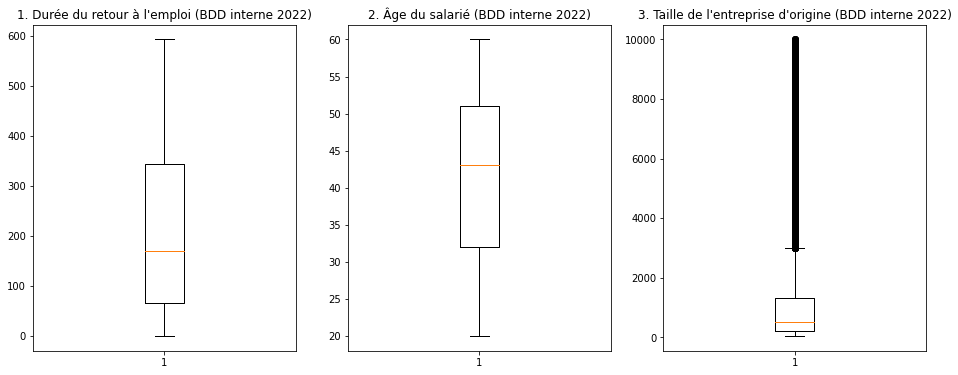

In [17]:
# visualisation BOITES A MOUSTACHES des données "endogènes" (hors genre et CSP qui sont des données catégorielles)
plt.subplots(1,3,figsize=(16,6))

print ("CARACTERISTIQUES ENDOGENES")

plt.subplot(1,3,1)
plt.title("1. Durée du retour à l'emploi (BDD interne 2022)")
plt.boxplot(tre_df.duree_rae)

plt.subplot(1,3,2)
plt.boxplot(tre_df.age)
plt.title("2. Âge du salarié (BDD interne 2022)")

plt.subplot(1,3,3)
plt.boxplot(tre_df.nbr_de_salaries)
plt.title("3. Taille de l'entreprise d'origine (BDD interne 2022)")

DYNAMIQUES TERRITORIALES


Text(0.5, 1.0, "5. Indice de concentration d'emploi de la commune (INSEE - 2018)")

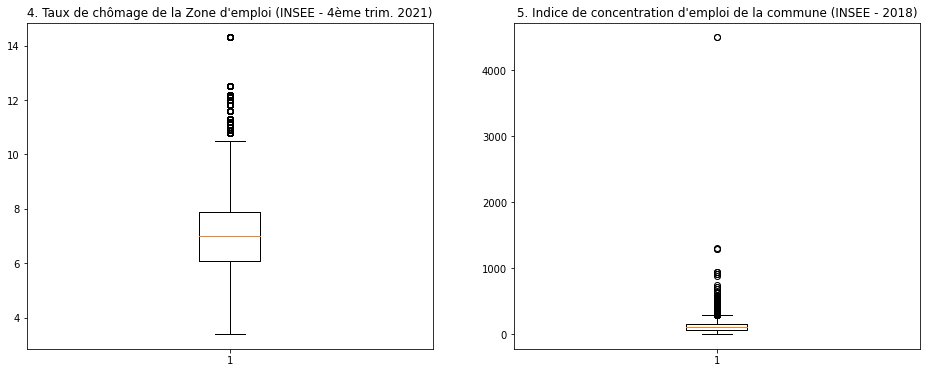

In [18]:
# visualisation BOITES A MOUSTACHES des indicateurs "exogènes"
plt.subplots(1,2,figsize=(16,6))

print ("DYNAMIQUES TERRITORIALES")

plt.subplot(1,2,1)
plt.boxplot(tre_df.chomage_2021T4)
plt.title("4. Taux de chômage de la Zone d'emploi (INSEE - 4ème trim. 2021)")

plt.subplot(1,2,2)
plt.boxplot(tre_df.concentr_emp2018)
plt.title("5. Indice de concentration d'emploi de la commune (INSEE - 2018)")

### 3.3 Visualisation des corrélations entre variables

Ensuite, nous traçons le pairplots entre les différentes variables pour déceler d'éventuels liens "évidents", sachant que notre variable à expliquer et à prédire est la duree_rae.

In [19]:
tre_df.columns

Index(['genre', 'age', 'csp', 'nbr_de_salaries', 'ville', 'duree_rae', 'ze',
       'chomage_2021T4', 'concentr_emp2018'],
      dtype='object')

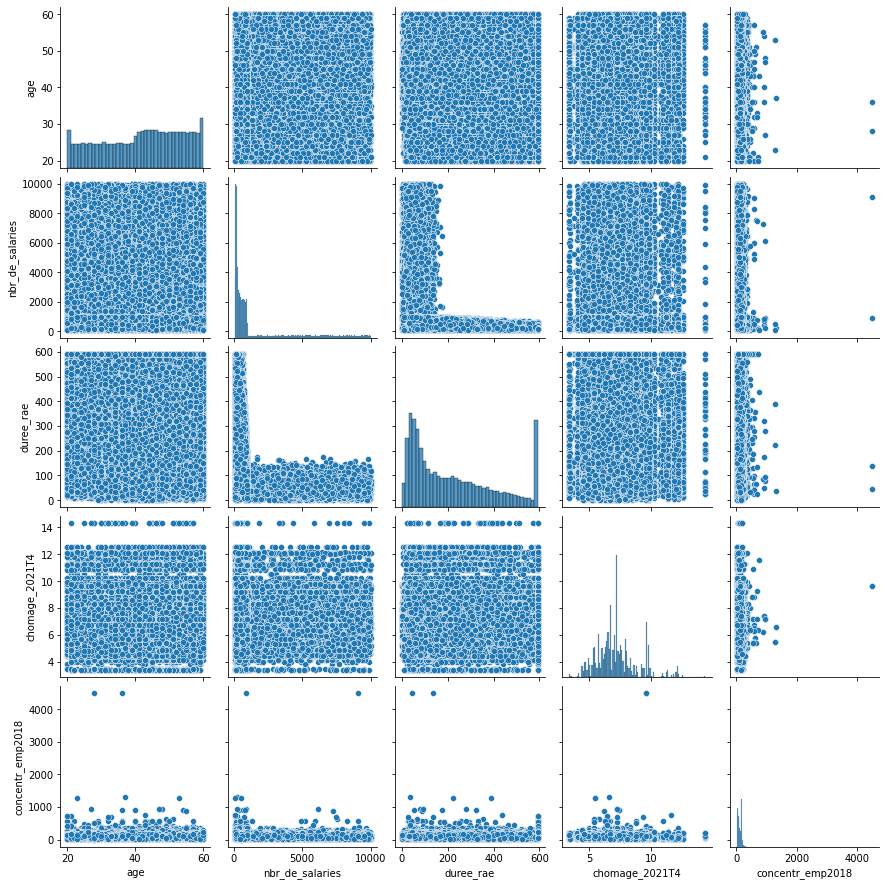

In [20]:
# visualiser les pairs plots avec TOUTES Les variables (hormis VILLE et ZE)
# ATTENTION , la fonction n'accepte pas les variables catégorielles
sns.pairplot (tre_df)

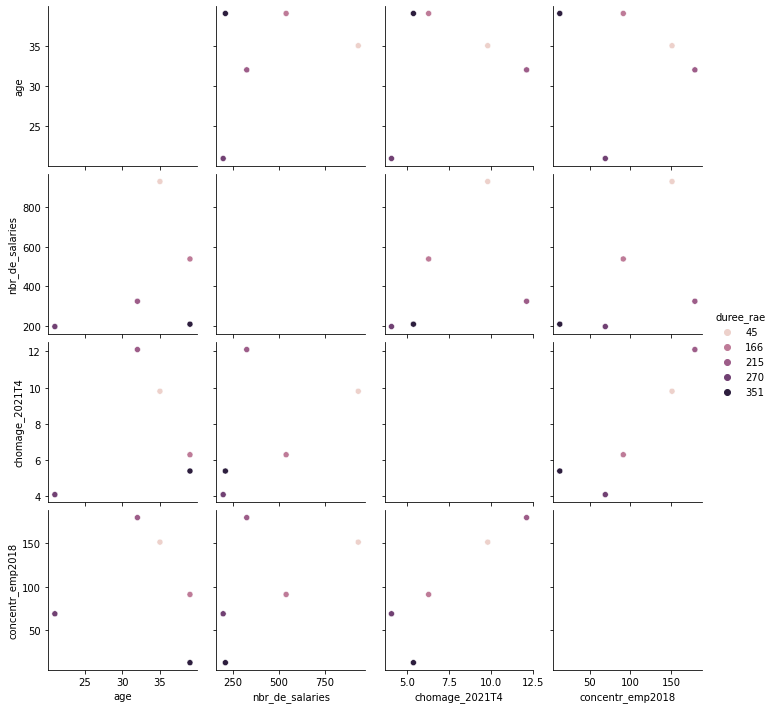

In [21]:
# visualiser les pairs plots en mettant en exergue la variable d'intérêt "duree_rae" 
sns.pairplot (tre_df.head(), hue = 'duree_rae')

> En première analyse, on note que :
> - l'hypothèse d'un effet positif de la taille de l'entreprise d'origine (effet de notoriété) sur la durée de retour à l'emploi semble confirmée ;
> - la variable "âge" n'indique aucune corrélation claire alors que les études montrent une meilleure employabilité 
> - les paramètres "exogènes" du taux de chômage et d'indice de concentration d'emploi ne montrent aucune corrélation, ce qui s'explique par la construction du jeu de données qui n'a pas affecté la ville selon une hypothèse : ce jeu de données ne peut donc pas refléter l'impact du dynamisme du marché de l'emploi local sur la rapidité à trouver un emploi, contrairement probablement à la réalité.

### 3.4 Représentation graphique de la variable d'intérêt

Text(0, 0.5, 'Fréquence')

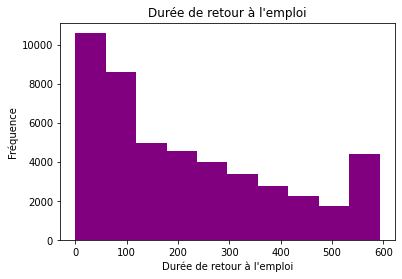

In [22]:
# représentation simple sous forme d'histogramme
plt.hist(tre_df.duree_rae, color="purple")
plt.title("Durée de retour à l'emploi")
plt.xlabel("Durée de retour à l'emploi")
plt.ylabel("Fréquence")

Text(0.5, 0.98, "ANALYSE DE LA DUREE DE RETOUR A L'EMPLOI")

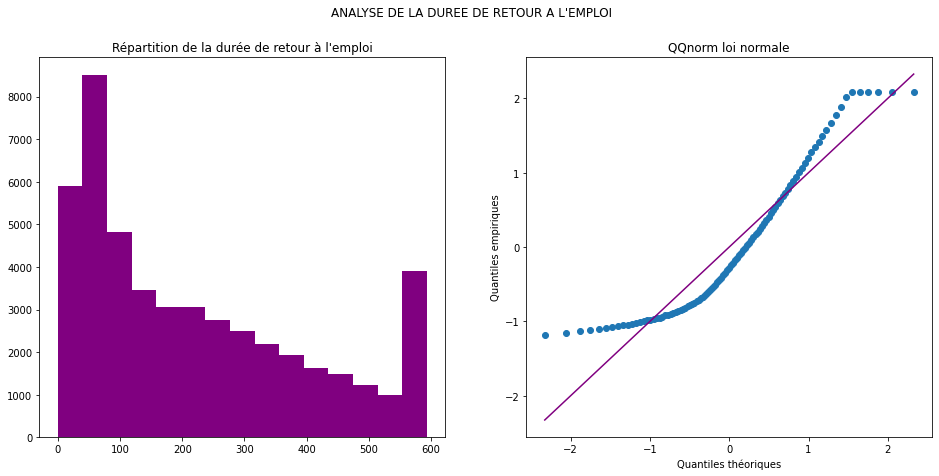

In [23]:
# QQ norm : permet de comparer la distribution avec la loi normale
from scipy.stats import norm

def QQnorm(x):
    """
    Cette fonction trace le QQplot comparant les quantiles empiriques d'un vecteur x avec ceux théoriques de la loi 
    normale N(0,1)
    
    Argument:
     x: un vecteur contenant les données.
    Renvoie:
     Le QQplot désiré.
    """
    
    #Standardisation des donnees#
    x_tilde = (x-np.mean(x))/np.std(x)
    
    #Calcul des quantiles empiriques#
    quantiles_emp = np.percentile(x_tilde,np.arange(101))
    
    #Calcul des quantiles theoriques#
    quantiles_theo = norm.ppf([0.01*i for i in range(101)],loc=0,scale=1)
    
    # Graphique #
    plt.scatter(quantiles_theo,quantiles_emp)
    plt.plot(quantiles_theo,quantiles_theo,color="purple")
    plt.xlabel("Quantiles théoriques")
    plt.ylabel("Quantiles empiriques")
    
plt.subplots(1,2,figsize=(16,7))

plt.subplot(1,2,1)
plt.hist(tre_df.duree_rae.values,bins=15,color="purple")
plt.title("Répartition de la durée de retour à l'emploi")

plt.subplot(1,2,2)
QQnorm(tre_df.duree_rae.values)
plt.title("QQnorm loi normale")

# titre général
plt.suptitle("ANALYSE DE LA DUREE DE RETOUR A L'EMPLOI") 


> La QQ Norm trace le QQplot comparant les quantiles empiriques d'un vecteur x avec ceux théoriques de la loi normale N(0,1)

> Cette visualisation montre que la variable de durée de retour à l'emploi ne suit pas la loi normale.

### 3.5 Approche des variables catégorielles GENRE et CSP

Visualiser les variables catéogorielles associées à une durée moyenne de retour à l'emploi

In [24]:
# création du groupby GENRE avec calcul de la moyenne
genre = tre_df.groupby('genre').mean()[['duree_rae']]
print (genre)

        duree_rae
genre            
f      220.749040
h      221.729011


In [25]:
# création du groupby GENRE avec calcul de la moyenne
csp = tre_df.groupby('csp').mean()[['duree_rae']]
print (csp)

                      duree_rae
csp                            
Cadre                181.497143
Cadre supérieur      138.561535
Employé              267.794980
Ouvrier              292.437500
Technicien Maîtrise  225.393203


Text(0.5, 0.98, "DUREE MOYENNE DE RETOUR A L'EMPLOI")

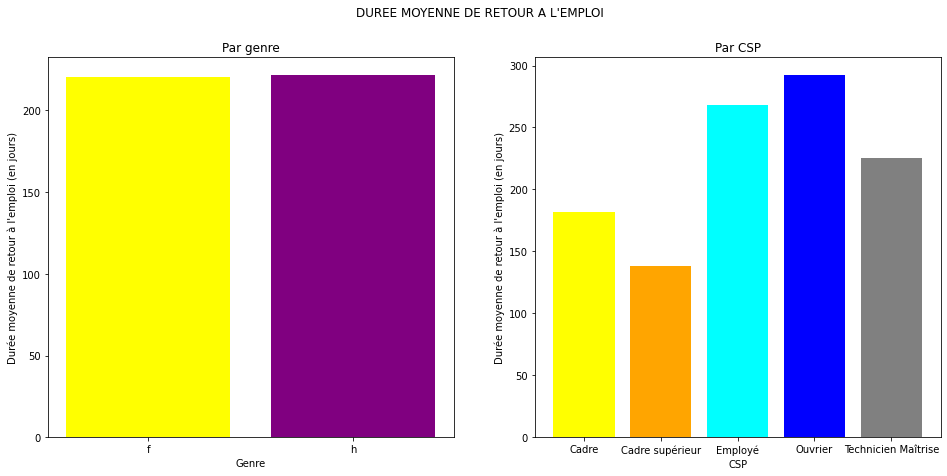

In [26]:
# visualiser l'impact des 2 variables catégorielles

# préciser la création de deux graphiques différents :
plt.subplots(1,2,figsize=(16,7))

# graphique 1 sur le genre
plt.subplot(1,2,1)
y_pos = range(0,len(genre.index))
plt.bar(y_pos, genre['duree_rae'], color=['yellow', 'purple'])
plt.xticks(y_pos, genre.index)
plt.title("Par genre")
plt.xlabel("Genre")
plt.ylabel("Durée moyenne de retour à l'emploi (en jours)")

# graphique 2 sur la CSP
plt.subplot(1,2,2)
y_pos2 = range(0,len(csp.index))
plt.bar(y_pos2, csp['duree_rae'], color=['yellow', 'orange', 'cyan', 'blue', 'grey'])
plt.xticks(y_pos2, csp.index)
plt.title("Par CSP")
plt.xlabel("CSP")
plt.ylabel("Durée moyenne de retour à l'emploi (en jours)")

# titre général
plt.suptitle("DUREE MOYENNE DE RETOUR A L'EMPLOI") 

> La durée moyenne de retour à l'emploi ne varie pas fondamentalement en fonction du genre : ellene varie que d'1 jour.

> Par contre, la corrélation est plus nette avec la CSP : le niveau de qualification lié à la CSP est inversement proportionnel à la durée de retour à l'emploi.

> Autrement dit, plus la CSP est "élevée", plus la durée de repositionnement est courte.

### 3.6 Approche des variables quantitatives 

Nous allons réaliser un zoom sur le croisement de la durée de retour à l'emploi avec l'âge, la taille de l'entreprise d'origine, le taux de chômage et l'indice de concentration de l'emploi.

> IMPOSSIBLE DE PRESENTER LES SCHEMAS COTE-A-COTE donc cellules neutralisées

# visualiser l'impact des 2 variables quantiatives endogènes (age et taille de l'entreprise)

# préciser la création de deux graphiques différents :
plt.subplots(1,2,figsize=(16,7))

# graphique 1 sur l'âge
plt.subplot(1,2,1) # 1 ligne et 2 colonnes - position 1
tre_df.plot.scatter(x='age', y='duree_rae')
plt.title("Par âge")
plt.xlabel("Age")
plt.ylabel("Durée (en jours)")

# graphique 2 sur la taille de l'entreprise d'origine
plt.subplot(1,2,2) # 1 ligne et 2 colonnes - position 2
tre_df.plot.scatter(x='nbr_de_salaries', y='duree_rae')
plt.title("Par taille de l'entreprise d'origine")
plt.xlabel("Taille de l'entreprise d'origine (en nombre de salariés)")
plt.ylabel("Durée (en jours)")

# titre général
plt.suptitle("DUREE MOYENNE DE RETOUR A L'EMPLOI : variables quantitatives endogènes")

# visualiser l'impact des 2 variables catégorielles

# préciser la création de deux graphiques différents :
plt.subplots(1,2,figsize=(16,7))

# graphique 1 sur l'âge
plt.subplot(1,2,1) # 1 ligne et 2 colonnes - position 1
tre_df.plot.scatter(x='chomage_2021T4', y='duree_rae')
plt.title("Taux de chômage de la zone d'emploi en 2021")
plt.xlabel("Taux de chômage (en %)")
plt.ylabel("Durée (en jours)")

# graphique 2 sur la taille de l'entreprise d'origine
plt.subplot(1,2,2) # 1 ligne et 2 colonnes - position 2
tre_df.plot.scatter(x='concentr_emp2018', y='duree_rae')
plt.title("Indice de concentration de l'emploi de la commune en 2018")
plt.xlabel("Indice de concentration de l'emploi (en nombre d'emplois pour 100 habitants)")
plt.ylabel("Durée (en jours)")

# titre général
plt.suptitle("DUREE MOYENNE DE RETOUR A L'EMPLOI : variables quantitatives endogènes")

Text(0, 0.5, 'Durée (en jours)')

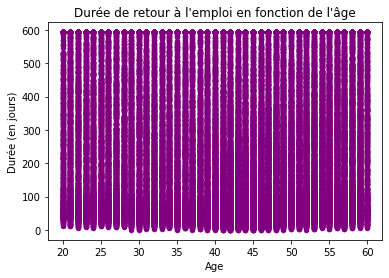

In [27]:
# croiser l'age et la durée de retour à l'emploi (variable quantitative endogène)
tre_df.plot.scatter(x='age', y='duree_rae', color='purple')
plt.title("Durée de retour à l'emploi en fonction de l'âge")
plt.xlabel("Age")
plt.ylabel("Durée (en jours)")

Text(0, 0.5, 'Durée (en jours)')

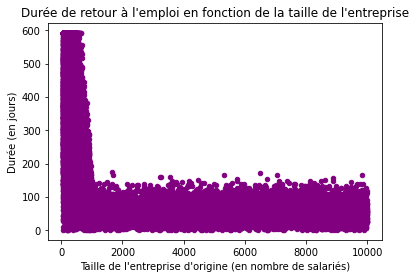

In [28]:
# croiser la taille de l'employeur d'origine et la durée de retour à l'emploi (variable quantitative endogène)
tre_df.plot.scatter(x='nbr_de_salaries', y='duree_rae', color='purple')
plt.title("Durée de retour à l'emploi en fonction de la taille de l'entreprise")
plt.xlabel("Taille de l'entreprise d'origine (en nombre de salariés)")
plt.ylabel("Durée (en jours)")

Text(0, 0.5, 'Durée (en jours)')

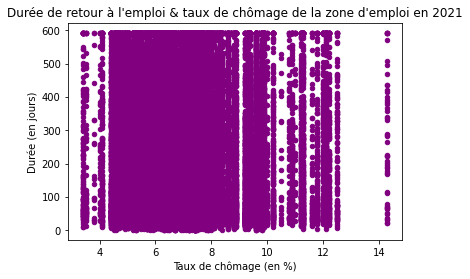

In [29]:
# croiser le taux de chômage et la durée de retour à l'emploi (variable quantitative exogène)
tre_df.plot.scatter(x='chomage_2021T4', y='duree_rae', color='purple')
plt.title("Durée de retour à l'emploi & taux de chômage de la zone d'emploi en 2021")
plt.xlabel("Taux de chômage (en %)")
plt.ylabel("Durée (en jours)")

Text(0, 0.5, 'Durée (en jours)')

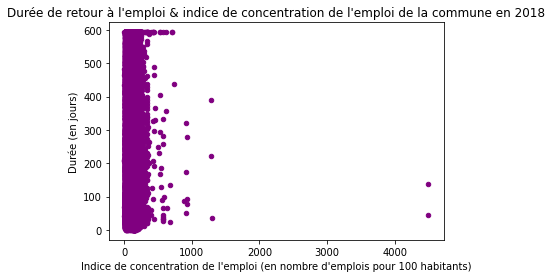

In [30]:
# croiser l'indice de concentration de l'emploi et la durée de retour à l'emploi (variable quantitative exogène)
tre_df.plot.scatter(x='concentr_emp2018', y='duree_rae', color='purple')
plt.title("Durée de retour à l'emploi & indice de concentration de l'emploi de la commune en 2018")
plt.xlabel("Indice de concentration de l'emploi (en nombre d'emplois pour 100 habitants)")
plt.ylabel("Durée (en jours)")

> La visualisation du croisement de la durée de retour à l'emploi avec les 4 variables quantitives (2 endogènes et 2 exogènes) confirme ce qu'indiquait le pair plot, à savoir qu'une seule association existe dans le jeu de données fictif, celle avec la taille de l'entreprise d'origine.

> Dans un jeu de données réel, il est fort à supposer que l'âge, et les données exogènes liées à la vitalité du territoire en matière d'emplois, soient beaucoup plus fortement corrélées que la taille de l'entreprise.

### 3.6 Corrélation de Pearson entre les différentes variables

In [31]:
# affichage des valeurs de corrélation de Pearson
tre_df.corr()

,age,nbr_de_salaries,duree_rae,chomage_2021T4,concentr_emp2018
age,1.000000,-0.000155,-0.036889,-0.002796,-0.006511
nbr_de_salaries,-0.000155,1.000000,-0.529443,-0.004887,-0.000666
duree_rae,-0.036889,-0.529443,1.000000,-0.014208,-0.090398
chomage_2021T4,-0.002796,-0.004887,-0.014208,1.000000,0.001587
concentr_emp2018,-0.006511,-0.000666,-0.090398,0.001587,1.000000


> Le coefficient de corrélation linéaire de Pearson permet de mesurer à la fois la force et le sens d'une association. Variant de -1 à +1, plus il s'approche de lune des 2 bornes et plus l'association est forte.

> Dans le cas de notre jeu de données, l'ensemble des coefficients se rapproche de 0, ce qui montre que le jeu de données fictif et aléatoire ne permet pas d'analyser d'association.

# 4. Préparation du dataframe pour la partie prédictive

Pour préparer la partie MACHINE LEARNING, nous allons supprimer les colonnes catégorielles villes et zone d'emploi, et transformer les 2 colonnes catégorielles GENRE et CSP en encodant les variables (OHE). 

In [32]:
tre_df.columns

Index(['genre', 'age', 'csp', 'nbr_de_salaries', 'ville', 'duree_rae', 'ze',
       'chomage_2021T4', 'concentr_emp2018'],
      dtype='object')

In [33]:
tre_df = tre_df.drop(["ville", "ze"], axis = 1)
tre_df

,genre,age,csp,nbr_de_salaries,duree_rae,chomage_2021T4,concentr_emp2018
0,h,39,Employé,208,351,5.4,12.7
1,f,32,Cadre supérieur,324,215,12.1,179.5
2,f,21,Cadre supérieur,196,270,4.1,68.9
3,f,39,Cadre,538,166,6.3,91.1
4,h,35,Ouvrier,930,45,9.8,151.3
...,...,...,...,...,...,...,...
49994,h,29,Technicien Maîtrise,2965,0,7.4,152.4
49995,h,33,Cadre,452,168,9.6,112.0
49996,h,30,Cadre,5010,55,8.8,101.0
49997,f,54,Cadre supérieur,586,33,5.5,118.2


In [34]:
# création des colonnes dummies
tre_df_dummies = pd.get_dummies(tre_df, columns=["genre", "csp"])
tre_df_dummies

,age,nbr_de_salaries,duree_rae,chomage_2021T4,concentr_emp2018,genre_f,genre_h,csp_Cadre,csp_Cadre supérieur,csp_Employé,csp_Ouvrier,csp_Technicien Maîtrise
0,39,208,351,5.4,12.7,0,1,0,0,1,0,0
1,32,324,215,12.1,179.5,1,0,0,1,0,0,0
2,21,196,270,4.1,68.9,1,0,0,1,0,0,0
3,39,538,166,6.3,91.1,1,0,1,0,0,0,0
4,35,930,45,9.8,151.3,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,29,2965,0,7.4,152.4,0,1,0,0,0,0,1
49995,33,452,168,9.6,112.0,0,1,1,0,0,0,0
49996,30,5010,55,8.8,101.0,0,1,1,0,0,0,0
49997,54,586,33,5.5,118.2,1,0,0,1,0,0,0


# 5. Statistiques prédictives : régression linéaire

### 5.1 Constitution des différents échantillons LEARN et TEST

In [35]:
# import de la librairie nécessaire statsmodels avec installation préalable via le shell (conda install -c conda-forge statsmodels)
import statsmodels.api as sm

In [36]:
# import et installation de scikit-learn
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [37]:
tre_df_dummies.columns

Index(['age', 'nbr_de_salaries', 'duree_rae', 'chomage_2021T4',
       'concentr_emp2018', 'genre_f', 'genre_h', 'csp_Cadre',
       'csp_Cadre supérieur', 'csp_Employé', 'csp_Ouvrier',
       'csp_Technicien Maîtrise'],
      dtype='object')

In [38]:
# constitution des échantillons LEARN and TEST en 2/3 - 1/3

n,d = tre_df_dummies.shape

n_learn = int(0.67*n) # Nb d'échantillons d'apprentissage
n_test = n-n_learn # Nb d'échantillons test

# Separation train/test#
tre_learn = tre_df_dummies.iloc[:n_learn]
tre_test = tre_df_dummies.iloc[n_learn:]

In [39]:
# ajout de l'intercept (valeur de Y lorsque X est égal à zéro) et séparation de la variable d'intérêt (duree_rae)
X_lm = sm.add_constant(tre_learn[['age', 'nbr_de_salaries', 'chomage_2021T4', 'concentr_emp2018', 'genre_f', 'genre_h', 'csp_Cadre', 'csp_Cadre supérieur', 'csp_Employé', 'csp_Ouvrier',
       'csp_Technicien Maîtrise']], prepend=False)
X_lm_test = sm.add_constant(tre_test[['age', 'nbr_de_salaries', 'chomage_2021T4', 'concentr_emp2018', 'genre_f', 'genre_h', 'csp_Cadre', 'csp_Cadre supérieur', 'csp_Employé', 'csp_Ouvrier',
       'csp_Technicien Maîtrise']], prepend=False)
Y_lm = tre_learn.duree_rae
Y_lm_test = tre_test.duree_rae

### 5.2 Entrainement du modèle

In [40]:
model_1 = sm.OLS(Y_lm,X_lm)
res_1 = model_1.fit()

In [41]:
# affichage des résultats
res_1.summary()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:              duree_rae   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     2244.
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:30:20   Log-Likelihood:            -2.0188e+05
No. Observations:               31758   AIC:                         4.038e+05
Df Residuals:                   31748   BIC:                         4.039e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                       

Résultats à commenter :
- R2 faible : 0.38. Un modèle est rejeté si la part de la variance expliquée est inférieure à 0.60...
- L'AIC reflète la complexité / parcimonie du modèle : l'idéal serait qu'il soit le plus petit possible
- F-statistic très élevé alors qu'il vaut mieux qu'il soit petit, donc cela montre que le modèle linéaire n'est pas adapté
- parmi les indicateurs "coefficients", certains sont très proches de 0 (pas d'impact)
- P valeur et intervalles ...

In [42]:
# vérification du modèle : caractère gaussien, indépendance avec les ^y, homoscédasticité des résidus

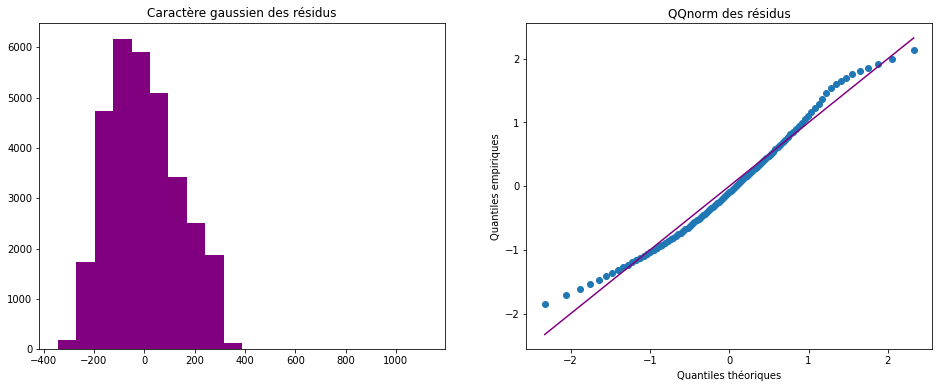

Text(0.5, 1.0, 'Homoscédasticté des résidus')

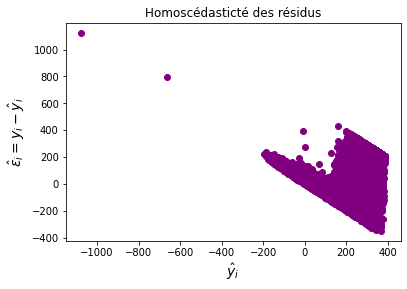

In [43]:
plt.subplots(1,2,figsize=(16,6))

plt.subplot(1,2,1)
plt.hist(res_1.resid, bins=20, color="purple")
plt.title ("Caractère gaussien des résidus")

plt.subplot(1,2,2)
QQnorm(res_1.resid)
plt.title ("QQnorm des résidus")

plt.show()

# pour vérifier l'homoscédasticité des résidus : si c'est proche de 0, homogène, c'est ok
plt.scatter(res_1.fittedvalues,res_1.resid, color="purple")
plt.xlabel("$\hat{y}_i$",fontsize=14)
plt.ylabel("$\hat{\epsilon}_i = y_i - \hat{y}_i$",fontsize=14)
plt.title ("Homoscédasticté des résidus")

RAPPEL : l'homoscédasticité mesur la variance des erreurs stochastiques de la régression est la même pour chaque observation i (de 1 à n observations). La notion d'homoscédasticité s'oppose à celle d'hétéroscédasticité, qui correspond au cas où la variance de l'erreur des variables est différente

### 5.3 Test du modèle : quelques indicateurs de performance

In [44]:
# vérification des résultats sur le jeu test avec la méthode predict
import sklearn
from sklearn.metrics import r2_score

In [45]:
# comparaison du R2 (part de la variance expliquée
print("R2 d'apprentissage: %.3f" % r2_score(Y_lm.values,res_1.fittedvalues.values))

Y_test_pred = res_1.predict(X_lm_test)
print("R2 test: %.3f" % r2_score(Y_lm_test,Y_test_pred))

R2 d'apprentissage: 0.389
R2 test: 0.384


> le R2 de test est le même que le R2 d'apprentissage

In [51]:
# calcul du RMSE (racine carrée de la moyenne arithmétique des carrés des écarts entre prévisions du modèle et observations
from sklearn.metrics import mean_squared_error
import math

In [52]:
actual = Y_lm_test
predicted = Y_test_pred
MSE = mean_squared_error(actual, predicted)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:",RMSE)

Root Mean Square Error: 140.34374360223987


# 6. Conclusion

Le projet ayant utilisé un faux jeu de données qui n'avait pas pu être paramétré avec toutes les hypothèses de départ, l'analyse descriptive n'a pas permis d'établir de corrélations suffisamment fortes entre variables.

De manière logique, la régression linéaire n'a donc pas permis de proposer un modèle performant (R2, RMSE, ...).

La prochaine étape serait de refaire l'exercice sur un vrai jeu de données afin de :
- disposer de données réelles pour confirmer ou infirmer, grâce à l'analyse descriptive, les hypothèses issues de la littérature et de l'expérience ;
- avoir potentiellement plus de variables explicatives, et donc explorer ce qu'un SI consigne comme données attachées à un individu et la capacité à les exploiter ;
- explorer la possibilité de traiter la variable catégorielle "métier", qui serait l'une des plus déterminante : si le système de recueil n'a pas prévu de recueillir cette information selon la typologie établie du code Rome, faut-il envisager au préalable un traitement par NLP (sous réserve que la donnée soit renseignée dans le système bien entendu) ? ;
- creuser le type d'indicateurs exogènes pour vérifier qu'ils sont complémentaires et non redondants ... 


Une fois les associations réelles mises en exergue dans la phase descriptive, il faudrait de nouveau tester le modèle linéaire :
- en proposant une validation croisée sur la partie TRAIN (validation croisée K-fold) ;
- en minimisant la fonction de coût avec une Descente de Gradient ;
- en approfondissant l'analyse des indicateurs lors de la phase de validation (R2, RMSE, coefficients, Pvalue, ...) ;
- en optimisant les hyperparamètres...

Il pourrait également être intéressant de tester d'autres méthodes de ML pour voir si elles sont plus performantes (forêt aléatoire, ...).

Enfin, la dernière étape consistera à construire le template adéquat pour injecter un ou plusieurs individus n et lire clairement  le ou les outputs de durée de repositionnement prévisionnelle, dans un format pertinent pour les futurs utilisateurs.

> Emmanuelle Meunier | `Projet DESU` Data Science pour les professionnels 2022 | `30/06/2022`